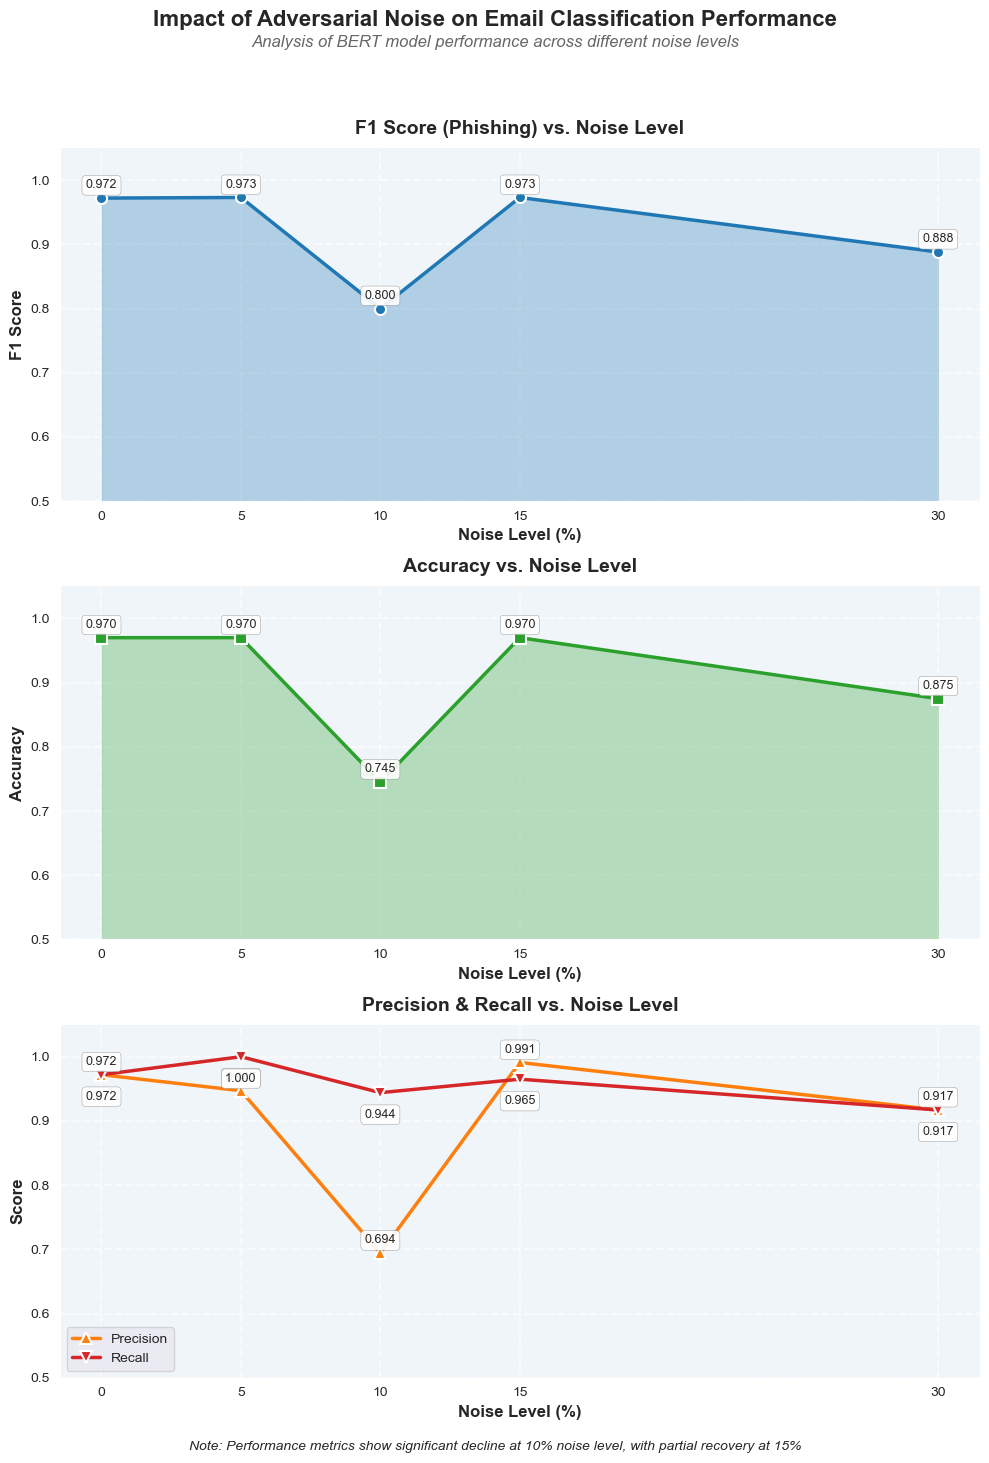

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

#  styling for all plots
plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial", "Helvetica", "DejaVu Sans"]
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

# using saved values
data = {
    "noise_level": [0, 5, 10, 15, 30],
    "f1_phishing": [0.972, 0.973, 0.800, 0.973, 0.888],
    "accuracy": [0.970, 0.970, 0.745, 0.970, 0.875],
    "precision": [0.972, 0.947, 0.694, 0.991, 0.917],
    "recall": [0.972, 1.000, 0.944, 0.965, 0.917],
}
df = pd.DataFrame(data)

#   colors
colors = {
    "f1": "#1f77b4",
    "accuracy": "#2ca02c",
    "precision": "#ff7f0e",
    "recall": "#d62728",
}

#  consistent background color for all plots
bg_color = "#F0F5FA"

# figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15), dpi=100)
fig.subplots_adjust(hspace=0.3)


def style_subplot(ax, title, ylabel, ylim=(0.5, 1.05)):
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel("Noise Level (%)", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_ylim(ylim)

    ax.set_facecolor(bg_color)

    ax.grid(True, linestyle="--", alpha=0.6, color="white", linewidth=1.5)
    ax.set_axisbelow(True)

    # Set x ticks
    ax.set_xticks(df["noise_level"])

    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(0.8)
    ax.spines["bottom"].set_linewidth(0.8)

    ax.yaxis.set_minor_locator(MultipleLocator(0.05))


axs[0].plot(
    df["noise_level"],
    df["f1_phishing"],
    marker="o",
    color=colors["f1"],
    linewidth=2.5,
    markersize=8,
    markeredgecolor="white",
    markeredgewidth=1.5,
)
axs[0].fill_between(
    df["noise_level"], df["f1_phishing"], 0.5, alpha=0.3, color=colors["f1"]
)
style_subplot(axs[0], "F1 Score (Phishing) vs. Noise Level", "F1 Score")

for x, y in zip(df["noise_level"], df["f1_phishing"]):
    axs[0].annotate(
        f"{y:.3f}",
        xy=(x, y),
        xytext=(0, 7),
        textcoords="offset points",
        ha="center",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9),
    )

# Accuracy with improved styling
axs[1].plot(
    df["noise_level"],
    df["accuracy"],
    marker="s",
    color=colors["accuracy"],
    linewidth=2.5,
    markersize=8,
    markeredgecolor="white",
    markeredgewidth=1.5,
)
axs[1].fill_between(
    df["noise_level"], df["accuracy"], 0.5, alpha=0.3, color=colors["accuracy"]
)
style_subplot(axs[1], "Accuracy vs. Noise Level", "Accuracy")

# Accuracy
for x, y in zip(df["noise_level"], df["accuracy"]):
    axs[1].annotate(
        f"{y:.3f}",
        xy=(x, y),
        xytext=(0, 7),
        textcoords="offset points",
        ha="center",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9),
    )

# Precision and Recall with improved styling
axs[2].plot(
    df["noise_level"],
    df["precision"],
    marker="^",
    label="Precision",
    linewidth=2.5,
    color=colors["precision"],
    markersize=8,
    markeredgecolor="white",
    markeredgewidth=1.5,
)
axs[2].plot(
    df["noise_level"],
    df["recall"],
    marker="v",
    label="Recall",
    linewidth=2.5,
    color=colors["recall"],
    markersize=8,
    markeredgecolor="white",
    markeredgewidth=1.5,
)
style_subplot(axs[2], "Precision & Recall vs. Noise Level", "Score")

# Precision and Recall
for label, data, offset in [
    ("precision", df["precision"], 7),
    ("recall", df["recall"], -18),
]:
    for x, y in zip(df["noise_level"], data):
        axs[2].annotate(
            f"{y:.3f}",
            xy=(x, y),
            xytext=(0, offset),
            textcoords="offset points",
            ha="center",
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9),
        )

# legend
legend = axs[2].legend(
    loc="lower left", frameon=True, framealpha=0.95, edgecolor="lightgray", fontsize=10
)
legend.get_frame().set_linewidth(1)

#  main title
fig.suptitle(
    "Impact of Adversarial Noise on Email Classification Performance",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)

# subtitle
fig.text(
    0.5,
    0.955,
    "Analysis of BERT model performance across different noise levels",
    ha="center",
    fontsize=12,
    style="italic",
    alpha=0.7,
)

# sizng
fig.text(
    0.5,
    0.02,
    "Note: Performance metrics show significant decline at 10% noise level, with partial recovery at 15%",
    ha="center",
    fontsize=10,
    style="italic",
)


plt.tight_layout(rect=[0, 0.03, 1, 0.94])


plt.show()